In [2]:
import numpy as np
import scipy as scp
import nibabel as nib
import matplotlib.pyplot as plt
from skimage.metrics import structural_similarity as ssim

In [3]:
# root mean squared error
def rmse(uncompr,compr):
    return np.sqrt(np.sum(np.square(abs(uncompr-compr)))/np.size(uncompr))

In [4]:
# read in image data
ref_data=nib.load("/home/veldmannm/Dokumente/Hiwi_project/ImageData/RestingState_data/original")
ref=ref_data.get_fdata()

compr_list=[ref]
compr_list.append(nib.load("Dicom_compr/gcc4/gcc4.nii").get_fdata())
compr_list.append(nib.load("Dicom_compr/gcc6/gcc6.nii").get_fdata())
compr_list.append(nib.load("Dicom_compr/gcc8/gcc8.nii").get_fdata())
compr_list.append(nib.load("Dicom_compr/gcc16/gcc16.nii").get_fdata())
compr_list.append(nib.load("Dicom_compr/gcc24/gcc24.nii").get_fdata())
compr_list.append(nib.load("Dicom_compr/gcc32/gcc32.nii").get_fdata())
compr_list.append(nib.load("Dicom_compr/scc8/scc8.nii").get_fdata())
compr_list.append(nib.load("Dicom_compr/scc16/scc16.nii").get_fdata())
compr_list.append(nib.load("Dicom_compr/scc24/scc24.nii").get_fdata())
# compr_list.append(nib.load("Dicom_compr/scc24_new/scc24_new.nii").get_fdata())
compr_list.append(nib.load("Dicom_compr/scc32/scc32.nii").get_fdata())
compr_list.append(nib.load("Dicom_compr/zfptol1e-04/zfptol1e-04.nii").get_fdata())
compr_list.append(nib.load("Dicom_compr/zfptol1e-05/zfptol1e-05.nii").get_fdata())
compr_list.append(nib.load("Dicom_compr/zfptol1e-06/zfptol1e-06.nii").get_fdata())
compr_list.append(nib.load("Dicom_compr/zfptol1e-07/zfptol1e-07.nii").get_fdata())
# compr_list.append(nib.load("Dicom_compr/zfptol5e-07/zfptol5e-07.nii").get_fdata())
compr_list.append(nib.load("Dicom_compr/zfptol1e-08/zfptol1e-08.nii").get_fdata())
compr_list.append(nib.load("Dicom_compr/rmOS/rmOS.nii").get_fdata())
# compr_list.append(nib.load("Dicom_compr/rmOS_zfptol5e-07/rmOS_zfptol5e-07.nii").get_fdata())
# compr_list.append(nib.load("Dicom_compr/rmOS_zfptol5e-07_gcc16/rmOS_zfptol5e-07_gcc16.nii").get_fdata())
# compr_list.append(nib.load("Dicom_compr/rmOS_zfptol5e-07_scc24/rmOS_zfptol5e-07_scc24.nii").get_fdata())
compr_list.append(nib.load("Dicom_compr/rmOS_zfptol1e-06/rmOS_zfptol1e-06.nii").get_fdata())
compr_list.append(nib.load("Dicom_compr/rmOS_zfptol1e-06_gcc8/rmOS_zfptol1e-06_gcc8.nii").get_fdata())
compr_list.append(nib.load("Dicom_compr/rmOS_zfptol1e-06_gcc16/rmOS_zfptol1e-06_gcc16.nii").get_fdata())
compr_list.append(nib.load("Dicom_compr/rmOS_zfptol1e-06_scc16/rmOS_zfptol1e-06_scc16.nii").get_fdata())
compr_list.append(nib.load("Dicom_compr/rmOS_zfptol1e-06_scc24/rmOS_zfptol1e-06_scc24.nii").get_fdata())


#define keys for result dict
mask_keys=["no_mask","fsl_mask","own_mask"]

metric_keys=["ssim","rmse","psnr","avg_signal"]

# compr_keys=["ref","gcc4","gcc6","gcc8","gcc16","gcc24","gcc32",\
#                   "scc8","scc16","scc24","scc24_new","scc32","zfptol_1e4","zfptol_1e5","zfptol_1e6","zfptol_1e7",\
#                   "zfptol_5e7","zfptol_1e8","rmOS","rmOS_zfp","rmOS_zfp5e7_gcc16","rmOS_zfp5e7_scc24",\
#                    "rmOS_zfp1e6","rmOS_zfp1e6_gcc8","rmOS_zfp1e6_gcc16","rmOS_zfp1e6_scc16","rmOS_zfp1e6_scc24"]

compr_keys=["ref","gcc4","gcc6","gcc8","gcc16","gcc24","gcc32",\
            "scc8","scc16","scc24","scc32","zfptol_1e4","zfptol_1e5","zfptol_1e6","zfptol_1e7",\
            "zfptol_1e8","rmOS",\
            "rmOS_zfp1e6","rmOS_zfp1e6_gcc8","rmOS_zfp1e6_gcc16","rmOS_zfp1e6_scc16","rmOS_zfp1e6_scc24"]

results={mask_key:{metric_key:{compr_key: None for compr_key in compr_keys} for metric_key in metric_keys} for mask_key in mask_keys}

ImageFileError: Cannot work out file type of "/home/veldmannm/Dokumente/Hiwi_project/ImageData/RestingState_data/original"

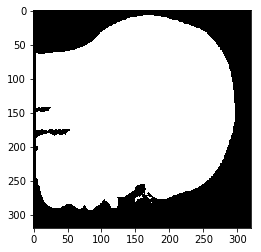

In [4]:
# read in fsl brain mask
ref_brain=nib.load("Dicom_compr/a_reference/reference_fslbrain.nii.gz").get_fdata()
fsl_mask=nib.load("Dicom_compr/a_reference/reference_fslbrain_mask.nii.gz").get_fdata()
fsl_mask_ix=np.nonzero(fsl_mask)

#define own mask
own_mask=ref.copy()
offset=3 # offset for ssi calculation (avoid edge averaging)
own_mask[:offset,:,:]=0
own_mask[-offset:,:,:]=0
own_mask[:,:offset,:]=0
own_mask[:,-offset:,:]=0
own_mask[:,:,:offset]=0
own_mask[:,:,-offset:]=0
threshold=15 # all points under threshold are set to 0
own_mask[own_mask<threshold]=0
own_mask[own_mask>=threshold]=1

own_mask_final=np.zeros_like(own_mask)
for k in range(own_mask.shape[0]):
    own_mask_final[k,...]=scp.ndimage.binary_fill_holes(own_mask[k,...]).astype(int)
own_mask_ix=np.nonzero(own_mask_final)

#define no mask slices
no_mask_ix=(slice(None,None),slice(None,None),slice(None,None))
mask_list=[no_mask_ix,fsl_mask_ix,own_mask_ix]

def getLargestCC(segmentation):
    from skimage.measure import label
    labels = label(segmentation)
    assert( labels.max() != 0 ) # assume at least 1 CC
    largestCC = labels == np.argmax(np.bincount(labels.flat)[1:])+1
    return largestCC

from scipy.ndimage.morphology import binary_erosion
own_mask_final = binary_erosion(own_mask_final, iterations=1)

own_mask_final=getLargestCC(own_mask_final)



#plt.figure()
#plt.imshow(ref_brain[100,...],cmap='gray')
#plt.figure()
#plt.imshow(fsl_mask[100,...],cmap='gray')
#plt.figure()
plt.imshow(own_mask_final[100,:,:],cmap='gray')

 *Calculation of structural similarity index (structsim), root mean square error (rms_error) and peak signal to noise ratio (psnr)*

In [5]:
# 3D calculation
max_pixel=4096 #maximum possible pixel value for psnr

# arrays are flattened if a non-cubic mask is applied, this affects ssim,
# but not rmse and psnr

for k,compr_method in enumerate(compr_list):
    calc_ssi=ssim(ref,compr_method,full=True)
    for j,mask in enumerate (mask_list):
        if j==0: #no mask result
            results[mask_keys[j]]['ssim'][compr_keys[k]]=calc_ssi[0]
        else:
            results[mask_keys[j]]['ssim'][compr_keys[k]]=calc_ssi[1][mask].mean()
        results[mask_keys[j]]['rmse'][compr_keys[k]]=rmse(ref[mask],compr_method[mask])
        results[mask_keys[j]]['avg_signal'][compr_keys[k]]=compr_method[mask].mean()
        if k>0:
            results[mask_keys[j]]['psnr'][compr_keys[k]]=10*np.log10(max_pixel**2/results[mask_keys[j]]['rmse'][compr_keys[k]])


In [28]:
import json
results_json = json.dumps(results)
f = open("compr_results.json","w")
f.write(results_json)
f.close()

print(json.dumps(results['own_mask'], indent=4))

{
    "ssim": {
        "ref": 1.0,
        "gcc4": 0.7972865230573536,
        "gcc6": 0.9136379869257707,
        "gcc8": 0.9569936376877843,
        "gcc16": 0.9876513888026648,
        "gcc24": 0.9936816713655571,
        "gcc32": 0.9961465166980903,
        "scc8": 0.9006007069626569,
        "scc16": 0.9767514168703173,
        "scc24": 0.9889092270963297,
        "scc32": 0.9940374535589361,
        "zfptol_1e4": 0.9598161068626744,
        "zfptol_1e5": 0.998229517186713,
        "zfptol_1e6": 0.9998835037293986,
        "zfptol_1e7": 0.9999704186924029,
        "zfptol_1e8": 0.9999738464854186,
        "rmOS": 0.99991303217963,
        "rmOS_zfp1e6": 0.9998150926897568,
        "rmOS_zfp1e6_gcc8": 0.9578776741806103,
        "rmOS_zfp1e6_gcc16": 0.9840013001827059,
        "rmOS_zfp1e6_scc16": 0.9749792222027486,
        "rmOS_zfp1e6_scc24": 0.9900870718155628
    },
    "rmse": {
        "ref": 0.0,
        "gcc4": 49.46512587791032,
        "gcc6": 29.670141622969975,
      

In [7]:
orig_sz = 7567680512
results['compression_factor'] = dict()
results['compression_factor']['ref'] = 1
results['compression_factor']['gcc4'] = orig_sz/770672088
results['compression_factor']['gcc6'] = orig_sz/1021164683
results['compression_factor']['gcc8'] = orig_sz/1271612338
results['compression_factor']['gcc16'] = orig_sz/2272978556
results['compression_factor']['gcc24'] = orig_sz/3274257031
results['compression_factor']['gcc32'] = orig_sz/4275414119
results['compression_factor']['scc8'] = orig_sz/1148981004
results['compression_factor']['scc16'] = orig_sz/2167064430
results['compression_factor']['scc24'] = orig_sz/3185294272
results['compression_factor']['scc32'] = orig_sz/4203848563
results['compression_factor']['zfptol_1e4'] = orig_sz/770075238
results['compression_factor']['zfptol_1e5'] = orig_sz/1477026174
results['compression_factor']['zfptol_1e6'] = orig_sz/2177827408
results['compression_factor']['zfptol_1e7'] = orig_sz/3116324395
results['compression_factor']['zfptol_1e8'] = orig_sz/3116324395
results['compression_factor']['rmOS'] = orig_sz/3819262352
results['compression_factor']['rmOS_zfp1e6'] = orig_sz/1089926167
results['compression_factor']['rmOS_zfp1e6_gcc8'] = orig_sz/229247219
results['compression_factor']['rmOS_zfp1e6_gcc16'] = orig_sz/377832206
results['compression_factor']['rmOS_zfp1e6_scc16'] = orig_sz/353445960
results['compression_factor']['rmOS_zfp1e6_scc24'] = orig_sz/492119412

In [8]:
print('bzip2_9', orig_sz/4632920814)
print('gzip_9', orig_sz/5691432220)
print('lzma_9', orig_sz/4488241152)
results['compression_factor']

bzip2_9 1.6334577722830037
gzip_9 1.3296618881635385
lzma_9 1.6861127233833624


{'ref': 1,
 'gcc4': 9.819585566721601,
 'gcc6': 7.410832589477637,
 'gcc8': 5.951248101211802,
 'gcc16': 3.329411310117085,
 'gcc24': 2.3112664767459425,
 'gcc32': 1.7700461993539112,
 'scc8': 6.5864278744855556,
 'scc16': 3.4921345241221093,
 'scc24': 2.3758183281597915,
 'scc32': 1.800179145035487,
 'zfptol_1e4': 9.827196277151298,
 'zfptol_1e5': 5.123592692677631,
 'zfptol_1e6': 3.474876146842946,
 'zfptol_1e7': 2.428399470909382,
 'zfptol_1e8': 2.428399470909382,
 'rmOS': 1.9814508181238448,
 'rmOS_zfp1e6': 6.94329647376931,
 'rmOS_zfp1e6_gcc8': 33.01100246716624,
 'rmOS_zfp1e6_gcc16': 20.029209770434445,
 'rmOS_zfp1e6_scc16': 21.411138811715375,
 'rmOS_zfp1e6_scc24': 15.37773216716759}

In [9]:
import pandas as pd
import copy
tmp = copy.deepcopy(results['own_mask'])
del(tmp['psnr'])
tmp['compression_factor'] = copy.deepcopy(results['compression_factor'])

# for key in tmp['avg_signal']:
#     if key != 'ref':
#         tmp['avg_signal'][key] /= tmp['avg_signal']['ref']

# for key,item in tmp.items():
#     print(key)
#     del(item['ref'])
#     del(item['rmOS'])
#     del(item['rmOS_zfp1e6_gcc8'])
#     del(item['rmOS_zfp1e6_scc24'])
df = pd.DataFrame(tmp)


(0.5, 1)

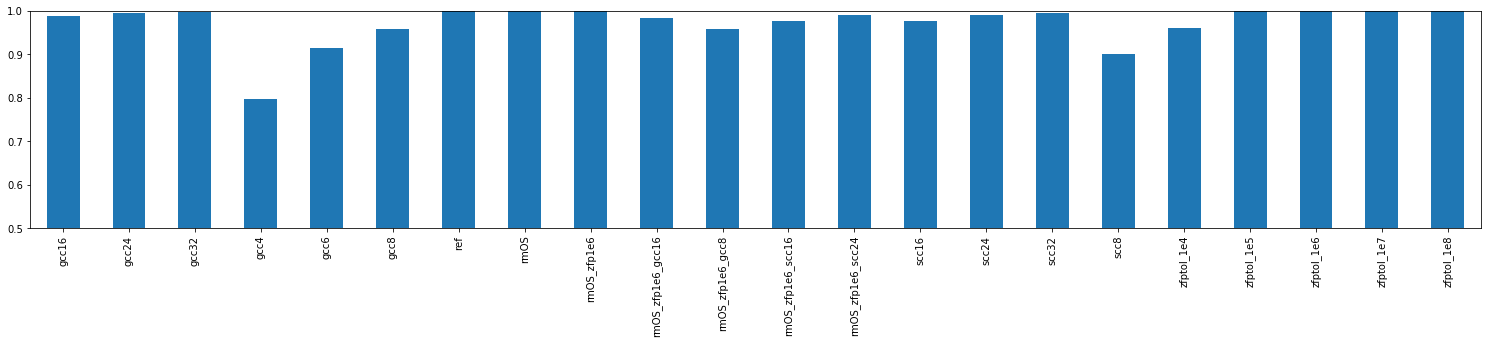

In [10]:
# df.plot(figsize=(18,4))
ax = df['ssim'].plot.bar(figsize=(26,4))
plt.ylim([0.5, 1])
# df['ssim'].plot(figsize=(26,4))

# ax.set_yscale('log')
# plt.ylim([1e-1, 1])

In [11]:
df

,ssim,rmse,avg_signal,compression_factor
gcc16,0.987651,7.807058,132.745793,3.329411
gcc24,0.993682,4.563021,135.197644,2.311266
gcc32,0.996147,3.066429,136.396306,1.770046
gcc4,0.797287,49.465126,102.676429,9.819586
gcc6,0.913638,29.670142,117.817188,7.410833
gcc8,0.956994,19.488061,124.554009,5.951248
ref,1.000000,0.000000,137.942596,1.000000
rmOS,0.999913,0.249293,137.926642,1.981451
rmOS_zfp1e6,0.999815,0.404844,137.986821,6.943296
rmOS_zfp1e6_gcc16,0.984001,9.620688,131.562070,20.029210


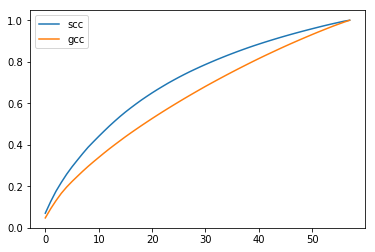

In [12]:
gcc_s = np.load('gcc_mtx.npy')
scc_s = np.load('scc_mtx.npy')
scc_s /= scc_s.sum()
gcc_s /= gcc_s.sum(axis=-1)[:,np.newaxis]
plt.plot(np.cumsum(scc_s), label='scc')
plt.plot(np.cumsum(gcc_s[160]), label='gcc')
plt.legend()

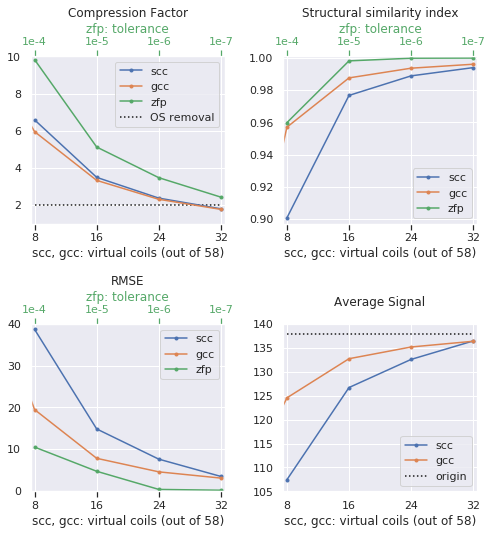

In [13]:
# import matplotlib as mpl
# mpl.rcParams.update(mpl.rcParamsDefault)
# plt.style.use('ggplot')
import seaborn as sns
sns.set()
sns.set_style('darkgrid')

cc_label = 'scc, gcc: virtual coils (out of 58)'
# zfp_sel = ['zfptol_1e4', 'zfptol_1e5', 'zfptol_1e6', 'zfptol_1e7', 'zfptol_1e8']
zfp_sel = ['zfptol_1e4', 'zfptol_1e5', 'zfptol_1e6', 'zfptol_1e7']

title_pad = 6
plt.figure(figsize=(8,8))
ax1 = plt.subplot(222)
ax2 = plt.subplot(223)
ax3 = plt.subplot(224)
ax4 = plt.subplot(221)
plt.subplots_adjust(hspace=0.6, wspace=0.3)
    
# df[['mean', '0', '1', '2', '3']]
# x = [1e-4, 1e-5, 1e-6, 1e-7, 1e-8]

x = [8, 16, 24, 32]
y = df['ssim'][['scc8', 'scc16', 'scc24', 'scc32']].values
ax1.plot(x, y, label='scc', marker='.')

x = [4, 6, 8, 16, 24, 32]
y = df['ssim'][['gcc4', 'gcc6', 'gcc8', 'gcc16', 'gcc24', 'gcc32']].values
ax1.plot(x, y, label='gcc', marker='.')



y = df['ssim'][zfp_sel].values
x = np.linspace(8,32,len(y))
p = ax1.plot(x, y, label='zfp', marker='.')

ax12 = ax1.twiny()
ax12.set_xlabel('zfp: tolerance', color=p[-1].get_color() )
ax12.set_xticks(x)
ax12.set_xticklabels(['1e-4', '1e-5', '1e-6', '1e-7', '1e-8'])
ax12.set_xlim([7.5,32.5])
# ax12.spines['top'].set_color(p[-1].get_color() )
ax12.tick_params(axis='x', color=p[-1].get_color() )
ax12.set_xticklabels(['1e-4', '1e-5', '1e-6', '1e-7', '1e-8'], color=p[-1].get_color() )
ax12.grid(False)



ax1.set_title('Structural similarity index', pad=title_pad)
ax1.set_xlabel(cc_label)
ax1.set_xticks([8,16,24,32])
ax1.set_xlim([7.5,32.5])
ax1.set_ylim([0.897, 1.001])
ax1.legend(loc=4)


x = [8, 16, 24, 32]
y = df['rmse'][['scc8', 'scc16', 'scc24', 'scc32']].values
ax2.plot(x, y, label='scc', marker='.')

x = [4, 6, 8, 16, 24, 32]
y = df['rmse'][['gcc4', 'gcc6', 'gcc8', 'gcc16', 'gcc24', 'gcc32']].values
ax2.plot(x, y, label='gcc', marker='.')


y = df['rmse'][zfp_sel].values
x = np.linspace(8,32,len(y))
p = ax2.plot(x, y, label='zfp', marker='.')

ax22 = ax2.twiny()
ax22.set_xlabel('zfp: tolerance',color=p[-1].get_color())
ax22.set_xticks(x)
ax22.set_xticklabels(['1e-4', '1e-5', '1e-6', '1e-7', '1e-8'])
ax22.set_xlim([7.5,32.5])
# ax22.spines['top'].set_color(p[-1].get_color() )
ax22.tick_params(axis='x', colors=p[-1].get_color() )
ax22.set_xticklabels(['1e-4', '1e-5', '1e-6', '1e-7', '1e-8'], color=p[-1].get_color() )
ax22.grid(False)


ax2.set_title('RMSE', pad=title_pad)
ax2.set_xlabel(cc_label)
ax2.set_xticks([8,16,24,32])
ax2.set_xlim([7.5,32.5])
ax2.set_ylim([-0.1, 40])
ax2.legend(loc=1)




x = [8, 16, 24, 32]
y = df['avg_signal'][['scc8', 'scc16', 'scc24', 'scc32']].values
ax3.plot(x, y, label='scc', marker='.')

x = [4, 6, 8, 16, 24, 32]
y = df['avg_signal'][['gcc4', 'gcc6', 'gcc8', 'gcc16', 'gcc24', 'gcc32']].values
ax3.plot(x, y, label='gcc', marker='.')



ax3.hlines(y=df['avg_signal'][['ref']].values[0], xmin=8, xmax=32, label='origin', linestyle=':')

ax3.set_title('Average Signal', pad=title_pad+12)
ax3.set_xlabel(cc_label)
ax3.set_xticks([8,16,24,32])
ax3.set_xlim([7.5,32.5])
ax3.set_ylim([105., 140])
ax3.legend(loc=4)




x = [8, 16, 24, 32]
y = df['compression_factor'][['scc8', 'scc16', 'scc24', 'scc32']].values
ax4.plot(x, y, label='scc', marker='.')

x = [4, 6, 8, 16, 24, 32]
y = df['compression_factor'][['gcc4', 'gcc6', 'gcc8', 'gcc16', 'gcc24', 'gcc32']].values
ax4.plot(x, y, label='gcc', marker='.')


y = df['compression_factor'][zfp_sel].values
x = np.linspace(8,32,len(y))
p = ax4.plot(x, y, label='zfp', marker='.')

ax42 = ax4.twiny()
ax42.set_xlabel('zfp: tolerance',color=p[-1].get_color())
ax42.set_xticks(x)
# ax42.spines['top'].set_color(p[-1].get_color())
ax42.tick_params(axis='x', colors=p[-1].get_color())
ax42.set_xticklabels(['1e-4', '1e-5', '1e-6', '1e-7', '1e-8'], color=p[-1].get_color())
ax42.set_xlim([7.5,32.5])
ax42.grid(False)

ax4.hlines(y=df['compression_factor'][['rmOS']].values[0], xmin=8, xmax=32, label='OS removal', linestyle=':')

ax4.set_title('Compression Factor', pad=title_pad)
ax4.set_xlabel(cc_label)
ax4.set_xticks([8,16,24,32])
ax4.set_xlim([7.5,32.5])
ax4.set_ylim([1., 10])
ax4.legend(loc=1)


plt.savefig('overview.png', dpi=120, bbox_inches='tight', pad_inches=0.05)
# plt.savefig('overview.jpg', dpi=120, bbox_inches='tight', pad_inches=0.05)

In [194]:
# compr_keys=["ref","gcc4","gcc6","gcc8","gcc16","gcc24","gcc32",\
#             "scc8","scc16","scc24","scc32","zfptol_1e4","zfptol_1e5","zfptol_1e6","zfptol_1e7",\
#             "zfptol_1e8","rmOS",\
#             "rmOS_zfp1e6","rmOS_zfp1e6_gcc8","rmOS_zfp1e6_gcc16","rmOS_zfp1e6_scc16","rmOS_zfp1e6_scc24"]

keys = ["rmOS_zfp1e6", "rmOS_zfp1e6_scc24", "rmOS_zfp1e6_gcc16"]

ssim_res = list()
im = list()
for key in keys:
    ix = compr_keys.index(key)
    calc_ssi=ssim(ref,compr_list[ix],full=True)
    ssim_res.append(calc_ssi[1])
    im.append(imcompr_list[ix])


NameError: name 'imcompr_list' is not defined

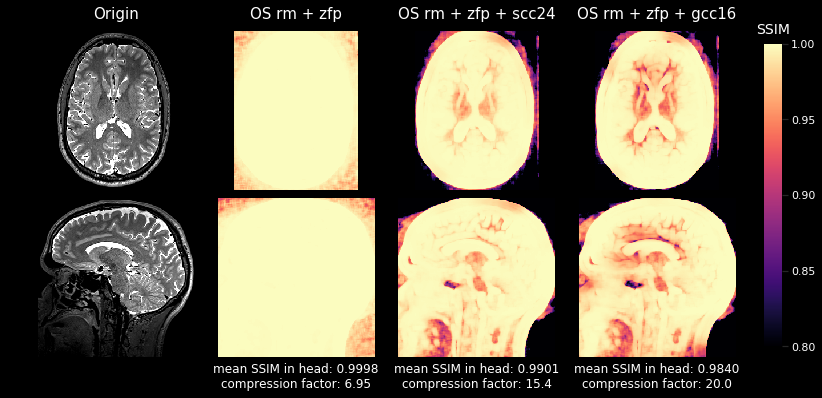

In [193]:
import matplotlib as mpl
mpl.rcParams["figure.facecolor"] = "0"
mpl.rcParams["axes.facecolor"] = "0"
mpl.rcParams["savefig.facecolor"] = "0"
mpl.rcParams['text.color'] = "1"
mpl.rcParams['axes.labelcolor'] = "1"

# mpl.rcParams['xtick.color'] = 
# mpl.rcParams['ytick.color'] = COLOR


fig, axes = plt.subplots(figsize=(12,6),nrows=2, ncols=2)
plt.subplots_adjust(wspace=0.05, hspace=0.05)
plt.subplot(241)
plt.title('Origin', fontsize=15, pad=12, fontstretch=1000)
plt.imshow(ref[10:,-40:5:-1,200].T, cmap='gray', vmin=40, vmax=420)
plt.axis('off')

plt.subplot(242)
plt.title('OS rm + zfp', fontsize=15, pad=12, fontstretch=900)
plt.imshow(ssim_res[0][10:,-40:5:-1,200].T, vmin=0.75, vmax=1, cmap='magma')
plt.axis('off')

plt.subplot(243)
plt.title('OS rm + zfp + scc24', fontsize=15, pad=12, fontstretch=900)
plt.imshow(ssim_res[1][10:,-40:5:-1,200].T, vmin=0.75, vmax=1, cmap='magma')
plt.axis('off')

plt.subplot(244)
plt.title('OS rm + zfp + gcc16', fontsize=15, pad=12, fontstretch=900)
plt.imshow(ssim_res[2][10:,-40:5:-1,200].T, vmin=0.8, vmax=1, cmap='magma')
plt.axis('off')


plt.subplot(245)
plt.imshow(ref[100,-40:5:-1,-20:20:-1].T, cmap='gray', vmin=40, vmax=420)
plt.axis('off')


plt.subplot(246)
plt.imshow(ssim_res[0][100,-40:5:-1,-20:20:-1].T, vmin=0.8, vmax=1, cmap='magma')
plt.axis('off')
plt.title('mean SSIM in head: 0.9998\ncompression factor: 6.95', pad=-190, fontsize=12)

plt.subplot(247)
plt.imshow(ssim_res[1][100,-40:5:-1,-20:20:-1].T, vmin=0.8, vmax=1, cmap='magma')
plt.axis('off')
plt.title('mean SSIM in head: 0.9901\ncompression factor: 15.4', pad=-190, fontsize=12)

plt.subplot(248)
im =plt.imshow(ssim_res[2][100,-40:5:-1,-20:20:-1].T, vmin=0.8, vmax=1, cmap='magma')
plt.axis('off')
plt.title('mean SSIM in head: 0.9840\ncompression factor: 20.0', pad=-190, fontsize=12)

fig.subplots_adjust(right=0.95)
cbar_ax = fig.add_axes([0.975, 0.15, 0.02, 0.7])
cbar_ax.set_title('SSIM', pad=10, fontsize=14)
cb = plt.colorbar(im, cax=cbar_ax)
cb.set_ticks([0.8, 0.85, 0.9, 0.95, 1.0])

cb.outline.set_visible(False)

cbytick_obj = plt.getp(cbar_ax, 'yticklabels')
plt.setp(cbytick_obj, color='w')


# average ssmin in head mask
# "rmOS_zfp1e6": 0.9998
# "rmOS_zfp1e6_gcc16": 0.9840
# "rmOS_zfp1e6_scc24": 0.9901

# compression factor
# rmOS_zfp1e6 6.95
# rmOS_zfp1e6_gcc16 20.0
# rmOS_zfp1e6_scc24 15.4

plt.savefig('ssim_maps.png', dpi=120, bbox_inches='tight', pad_inches=0.1)

mpl.rcParams["figure.facecolor"] = "1"
mpl.rcParams["axes.facecolor"] = "1"
mpl.rcParams["savefig.facecolor"] = "1"
mpl.rcParams['text.color'] = "0"
mpl.rcParams['axes.labelcolor'] = "0"



In [153]:
im[0]-ref

In [154]:
a.

<bound method _AxesBase.axis of <matplotlib.axes._axes.Axes object at 0x7f7eec297128>>

In [151]:
a

[]